In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv("resultats.csv")
data = data.sort_values(by='Nombre')

x_values = data['Nombre']
y_algo1 = data['Texec1'] + 1e-6  # Ajouter une petite constante pour éviter les valeurs nulles en échelle log
y_algo2 = data['Texec2'] + 1e-6
y_algo3 = data['Texec3'] + 1e-6


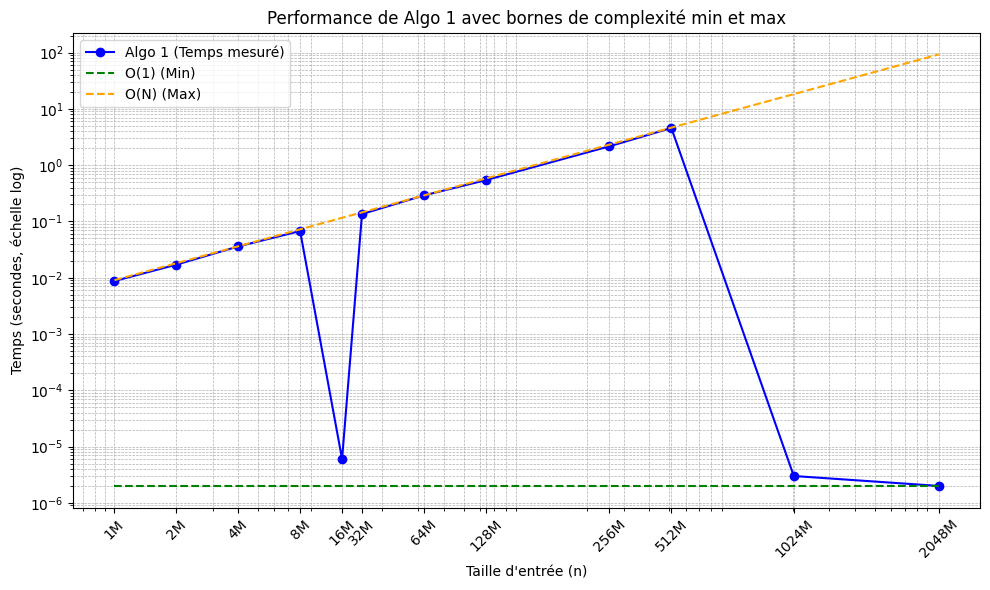

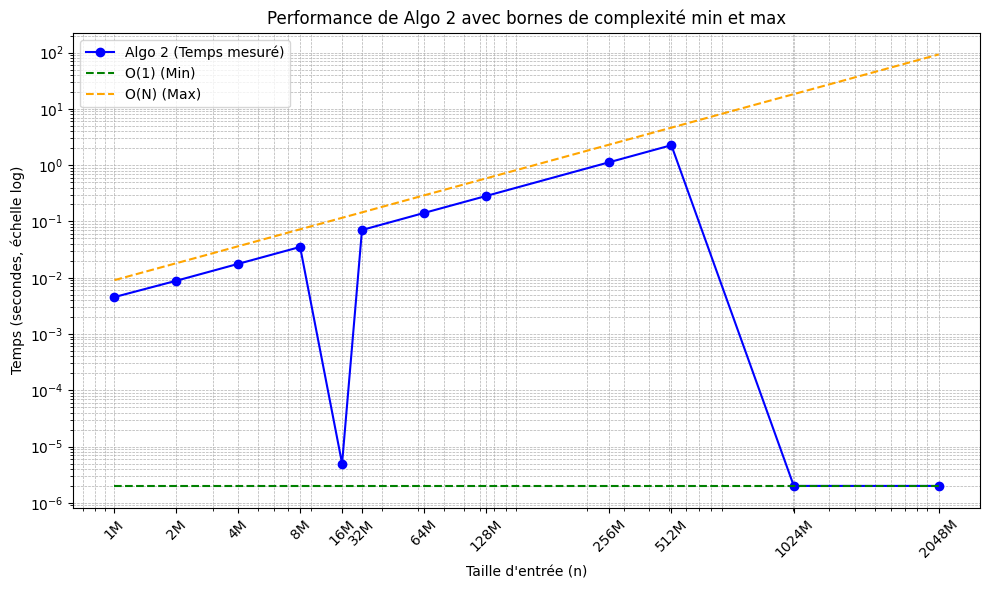

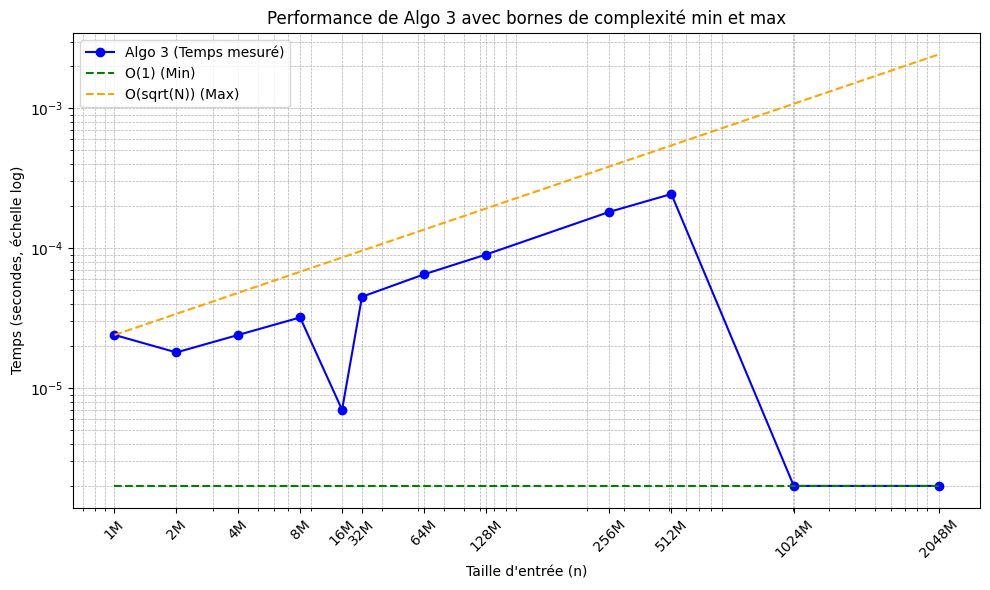

In [33]:

def compute_complexity_bounds(x, y_real, complexity_func):
    min_ratio = min(y_real[i] / complexity_func(x[i]) for i in range(len(x)))
    max_ratio = max(y_real[i] / complexity_func(x[i]) for i in range(len(x)))
    return [min_ratio * complexity_func(n) for n in x], [max_ratio * complexity_func(n) for n in x]

# Définir les fonctions de complexité
def complexity_O1(n): return 1
def complexity_ON(n): return n
def complexity_OsqrtN(n): return np.sqrt(n)

# Obtenir les valeurs de complexité pour chaque algorithme
o1_min, o1_max = compute_complexity_bounds(x_values, y_algo1, complexity_O1)
on_min, on_max = compute_complexity_bounds(x_values, y_algo1, complexity_ON)
osqrt_n_min, osqrt_n_max = compute_complexity_bounds(x_values, y_algo3, complexity_OsqrtN)

# Fonction pour tracer les performances avec les bornes min et max
def plot_algorithm_performance_with_bounds(x, y_real, algo_name, y_min, y_max, labels):
    plt.figure(figsize=(10, 6))
    
    # Tracer les données réelles
    plt.plot(x, y_real, label=f"{algo_name} (Temps mesuré)", color='blue', marker='o')
    
    # Tracer les bornes de complexité min et max
    plt.plot(x, y_min, label=f"{labels[0]} (Min)", color='green', linestyle='--')
    plt.plot(x, y_max, label=f"{labels[1]} (Max)", color='orange', linestyle='--')
    
    # Configurer l'échelle logarithmique pour les axes x et y
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel("Taille d'entrée (n)")
    plt.ylabel("Temps (secondes, échelle log)")
    plt.title(f"Performance de {algo_name} avec bornes de complexité min et max")
    
    plt.xticks(x_values, labels=['1M', '2M', '4M', '8M', '16M', '32M', '64M', '128M', '256M', '512M', '1024M', '2048M'], rotation=45)
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

plot_algorithm_performance_with_bounds(
    x_values, y_algo1, "Algo 1", o1_min, on_max, ["O(1)", "O(N)"]
)

plot_algorithm_performance_with_bounds(
    x_values, y_algo2, "Algo 2", o1_min, on_max, ["O(1)", "O(N)"]
)

plot_algorithm_performance_with_bounds(
    x_values, y_algo3, "Algo 3", o1_min, osqrt_n_max, ["O(1)", "O(sqrt(N))"]
)
